In [2]:
from neural_implementation import neural_classification as nc
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('../datasets/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 150
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [5]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

df_short = df[df['variety'] != 'Setosa']
print(df_short)

     sepal.length  sepal.width  petal.length  petal.width     variety
50            7.0          3.2           4.7          1.4  Versicolor
51            6.4          3.2           4.5          1.5  Versicolor
52            6.9          3.1           4.9          1.5  Versicolor
53            5.5          2.3           4.0          1.3  Versicolor
54            6.5          2.8           4.6          1.5  Versicolor
55            5.7          2.8           4.5          1.3  Versicolor
56            6.3          3.3           4.7          1.6  Versicolor
57            4.9          2.4           3.3          1.0  Versicolor
58            6.6          2.9           4.6          1.3  Versicolor
59            5.2          2.7           3.9          1.4  Versicolor
60            5.0          2.0           3.5          1.0  Versicolor
61            5.9          3.0           4.2          1.5  Versicolor
62            6.0          2.2           4.0          1.0  Versicolor
63            6.1   

In [6]:
N = df_short.shape[0]
print(f'Velicina skupa podataka: {N}')

X = np.ones((N, m + 1))
X[:, 1] = df_short[attr1]
X[:, 2] = df_short[attr2]

y = df_short['variety']

Velicina skupa podataka: 100


In [ ]:
classes = df_short['variety'].unique()
n_classes = len(classes)

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Mapiranje imena klasa u numericke vrednosti:
Versicolor -> 0
Virginica -> 1

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Versicolor
1 -> Virginica


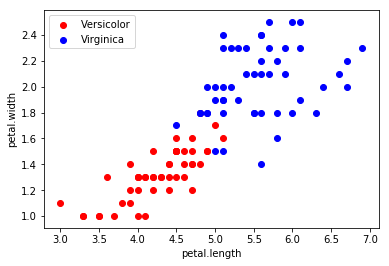

In [8]:
colors = ['red', 'blue']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [9]:
y = y.replace(name_to_class_dict)
y = np.array(y).reshape(-1, 1)

In [10]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.  4.7 1.4]
 [1.  4.5 1.5]
 [1.  4.9 1.5]
 [1.  4.  1.3]
 [1.  4.6 1.5]
 [1.  4.5 1.3]
 [1.  4.7 1.6]
 [1.  3.3 1. ]
 [1.  4.6 1.3]
 [1.  3.9 1.4]]
 ...
Ciljne promenljive:
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
 ...


In [11]:
# nn = NeuralNetwork(m, [3, 4], 1)
nn = nc.NeuralNetwork(m, [2*m, 2*m, 2*m, 2*m], 1)
nn.print_network()
print()

nn.print_layer_mapper_sizes()
print()

nn.print_model()

~ Neural network ~
Layer 1:
[1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]
Layer 4:
[1. 1. 1. 1. 1.]
Layer 5:
[1. 1. 1. 1. 1.]
Layer 6:
[1.]

Dimenzije matrica modela koji mapiraju slojeve:
0 -> 1: 4 x 3
1 -> 2: 4 x 5
2 -> 3: 4 x 5
3 -> 4: 4 x 5
4 -> 5: 1 x 5

Model:
W_0: 0 -> 1
[[ 0.93106706 -0.56565849  0.21140032]
 [-0.27507527  0.65257868  0.76916596]
 [-0.60997311 -0.58371011  0.84484544]
 [ 0.76710491 -0.07758547 -0.95346618]]
W_1: 1 -> 2
[[-0.06872355  0.07018709  0.52971167 -0.70502968 -0.41881554]
 [-0.20651085 -0.61621033  0.20540171 -0.30974407  0.12936068]
 [ 0.46609425  0.03251642 -0.01249282  0.07780336  0.06882489]
 [-0.6427296  -0.31710344 -0.9376132  -0.15603658 -0.71957061]]
W_2: 2 -> 3
[[-0.04674324 -0.83019147 -0.81821263  0.63130592 -0.65491338]
 [ 0.33336663 -0.85514124 -0.30631732  0.57485623  0.21816359]
 [-0.88711718  0.43786333 -0.78667254 -0.15492989  0.19160307]
 [ 0.88855164 -0.73996093  0.98105371  0.69862073  0.91096681]]
W_3: 3 -> 4
[[ 0.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.3, 
                                                    random_state=7)

In [13]:
print(f'X_train:')
print(X_train)
print()

print(f'y_train:')
print(y_train)
print()

print(f'X_test:')
print(X_test)
print()

print(f'y_test:')
print(y_test)

X_train:
[[1.  4.9 1.5]
 [1.  5.8 1.6]
 [1.  4.5 1.5]
 [1.  3.9 1.2]
 [1.  4.1 1. ]
 [1.  4.4 1.2]
 [1.  5.5 2.1]
 [1.  3.5 1. ]
 [1.  4.9 1.5]
 [1.  5.3 2.3]
 [1.  5.8 2.2]
 [1.  5.3 1.9]
 [1.  5.1 1.6]
 [1.  3.9 1.4]
 [1.  4.3 1.3]
 [1.  4.1 1.3]
 [1.  4.4 1.4]
 [1.  4.5 1.7]
 [1.  4.2 1.3]
 [1.  3.7 1. ]
 [1.  6.7 2. ]
 [1.  3.8 1.1]
 [1.  6.7 2.2]
 [1.  4.2 1.2]
 [1.  4.7 1.4]
 [1.  4.2 1.5]
 [1.  4.4 1.3]
 [1.  6.1 2.5]
 [1.  4.7 1.5]
 [1.  5.9 2.1]
 [1.  5.  1.9]
 [1.  5.7 2.1]
 [1.  6.  1.8]
 [1.  5.  2. ]
 [1.  5.  1.5]
 [1.  4.9 1.8]
 [1.  5.5 1.8]
 [1.  6.9 2.3]
 [1.  6.4 2. ]
 [1.  3.3 1. ]
 [1.  4.  1.3]
 [1.  4.7 1.4]
 [1.  4.5 1.3]
 [1.  6.6 2.1]
 [1.  5.1 2.4]
 [1.  5.8 1.8]
 [1.  5.6 2.4]
 [1.  5.  1.7]
 [1.  5.2 2.3]
 [1.  4.8 1.8]
 [1.  4.6 1.4]
 [1.  4.8 1.8]
 [1.  4.  1. ]
 [1.  4.8 1.8]
 [1.  4.5 1.5]
 [1.  4.5 1.5]
 [1.  5.6 1.4]
 [1.  5.5 1.8]
 [1.  5.6 1.8]
 [1.  3.5 1. ]
 [1.  5.4 2.1]
 [1.  4.5 1.6]
 [1.  5.1 1.9]
 [1.  4.5 1.5]
 [1.  4.7 1.6]
 [1.  4.  1.2]
 

In [14]:
print('Testiranje backrpopagation algoritma:\n')
loss, gradient = nn.backward_propagation(X_train[0].reshape(1, -1), y_train[0].reshape(1, -1))
grad_approx = nc.gradient_checking(X_train[0].reshape(1, -1), y_train[0].reshape(1, -1), nn.model)

diff = abs(gradient - grad_approx)
print('|gradient - grad_approx|:')
print(diff)

Testiranje backrpopagation algoritma:

|gradient - grad_approx|:
[5.90163111e-04 2.89179926e-03 8.85244666e-04 5.94046214e-06
 2.91082345e-05 8.91069276e-06 4.88825135e-04 2.39524453e-03
 7.33237725e-04 7.12533578e-04 3.49141308e-03 1.06880034e-03
 4.82981146e-03 8.64236952e-04 4.74921733e-03 4.80526458e-04
 1.25826665e-03 5.38003093e-03 9.62692105e-04 5.29025539e-03
 4.96099084e-01 2.41042103e-01 1.74506650e-01 1.24155001e-01
 2.59783889e-01 4.47082445e-02 2.23906612e-02 1.95688738e-02
 8.42533910e-03 2.58978978e-02 3.23947756e-04 6.91695231e-04
 1.66132156e-02 1.04691298e-02 6.76681618e-03 2.39035184e-02
 1.00415707e-02 8.41424367e-03 9.12811399e-03 3.36278044e-03
 1.26531157e-03 2.83936592e-04 4.94884032e-04 2.82520706e-04
 2.33610099e-04 3.06332461e-04 6.87411677e-05 7.69947980e-03
 4.39549941e-03 3.63454087e-03 4.76596625e-03 1.06948537e-03
 8.56976876e-02 3.02270817e-02 4.47056707e-02 2.17608284e-02
 6.99129720e-02 5.59598140e-02 1.97380106e-02 2.91923981e-02
 1.42096239e-02 4.56

In [15]:
lambdas = [0] + [0.01 * (1.5**i) for i in range(13)]

print('lamda parameters:')
for i, lambda_param in enumerate(lambdas):
    print(f'lambda_{i} = {lambda_param}')

lamda parameters:
lambda_0 = 0
lambda_1 = 0.01
lambda_2 = 0.015
lambda_3 = 0.0225
lambda_4 = 0.03375
lambda_5 = 0.050625
lambda_6 = 0.0759375
lambda_7 = 0.11390625
lambda_8 = 0.170859375
lambda_9 = 0.2562890625
lambda_10 = 0.38443359375
lambda_11 = 0.576650390625
lambda_12 = 0.8649755859375
lambda_13 = 1.29746337890625


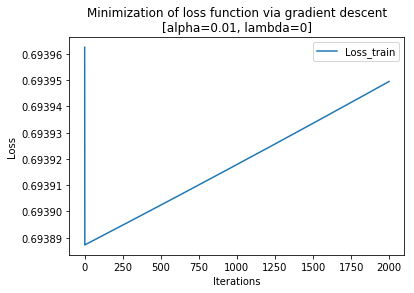

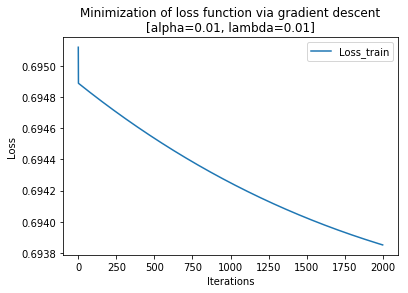

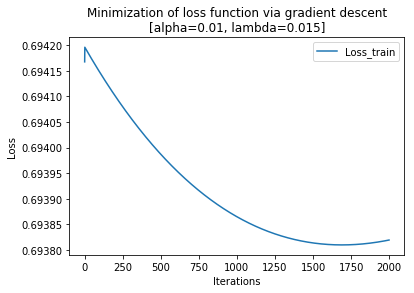

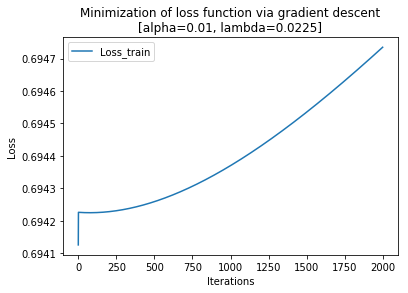

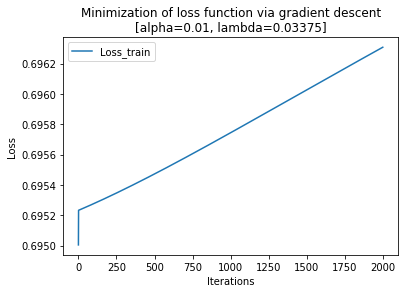

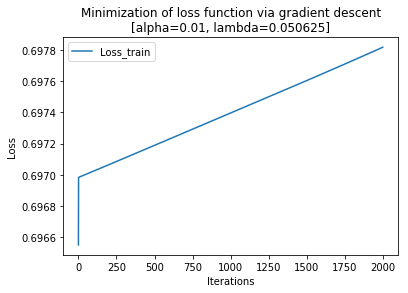

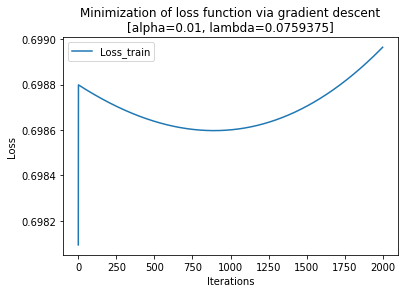

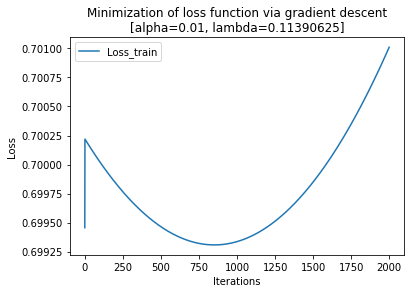

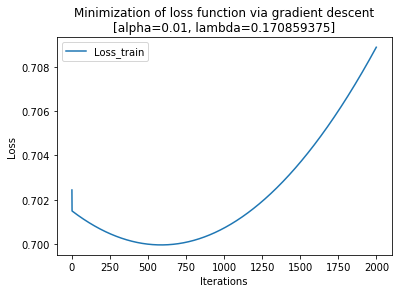

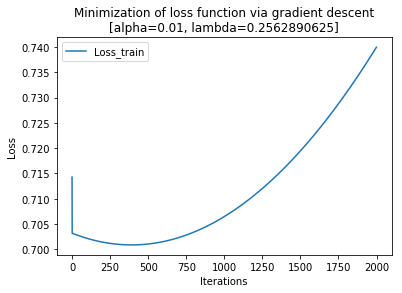

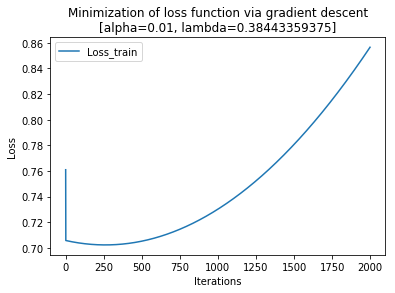

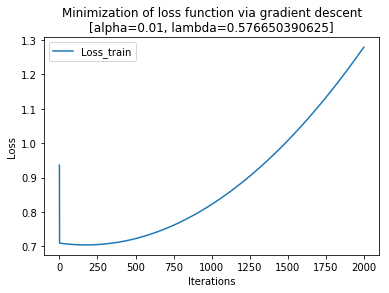

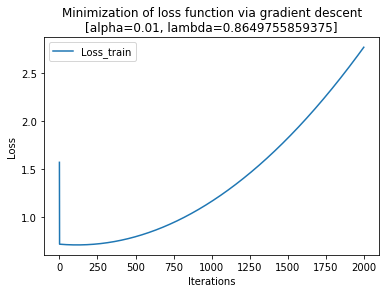

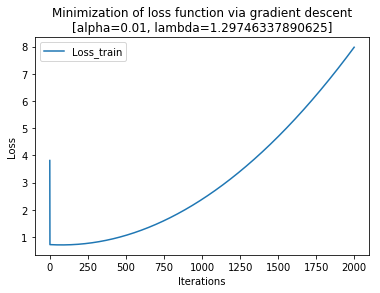

In [16]:
classifiers = [nn.fit(X_train, y_train, alpha=0.01, num_iter=2000, 
                      lambda_param=lambda_param, plot=True) for lambda_param in lambdas]

In [17]:
losses_test = [clf.loss(X_test, y_test) for clf in classifiers]

print('Funkcije gubitka za svaki klasifikator posebno na test skupu:')
for i, loss in enumerate(losses_test):
    print(f'Klasifikator {i}: loss_{i} = {loss}')

Funkcije gubitka za svaki klasifikator posebno na test skupu:
Klasifikator 0: loss_0 = 0.6939344344628571
Klasifikator 1: loss_1 = 0.6932155462699879
Klasifikator 2: loss_2 = 0.693205919862258
Klasifikator 3: loss_3 = 0.6941971875046342
Klasifikator 4: loss_4 = 0.6958236898436211
Klasifikator 5: loss_5 = 0.6972639751449261
Klasifikator 6: loss_6 = 0.697983783791303
Klasifikator 7: loss_7 = 0.6981573292143196
Klasifikator 8: loss_8 = 0.6981628577775838
Klasifikator 9: loss_9 = 0.6981533364337442
Klasifikator 10: loss_10 = 0.6981469072610921
Klasifikator 11: loss_11 = 0.6981427965863138
Klasifikator 12: loss_12 = 0.6981401962441459
Klasifikator 13: loss_13 = 0.6981385996109994


In [18]:
min_loss = float('inf')
best_clf = None
best_lambda = None

for i in range(len(losses_test)):
    if losses_test[i] < min_loss:
        min_loss = losses_test[i]
        best_clf = classifiers[i]
        best_lambda = lambdas[i]
        
print(f'Najmanji gubitak (na test skupu) za svaki klasifikator: {min_loss}\n')
print(f'Model najboljeg klasifikatora:')

best_clf.print_model()
print()

print(f'Regularizacioni parametar lambda za koji je naucen najbolji model: {best_lambda}')
print(f'Najbolji lambda preko klasifikatora:: {best_clf.lambda_learned}')

Najmanji gubitak (na test skupu) za svaki klasifikator: 0.693205919862258

Model najboljeg klasifikatora:
Model:
W_0: 0 -> 1
[[ 0.93043458 -0.34197352  0.12924708]
 [-0.27541989  0.3949286   0.46630021]
 [-0.61015445 -0.35188537  0.51373594]
 [ 0.7658268  -0.0458872  -0.57704203]]
W_1: 1 -> 2
[[-0.07087221  0.04410965  0.319445   -0.4274198  -0.25171658]
 [-0.20734932 -0.37217997  0.12327398 -0.18761376  0.08059705]
 [ 0.46277422  0.02149171 -0.01016396  0.04736838  0.04443059]
 [-0.64700373 -0.19049063 -0.57230565 -0.09451823 -0.43375049]]
W_2: 2 -> 3
[[-0.18761376  0.08059705  0.46277422  0.02149171 -0.01016396]
 [ 0.04736838  0.04443059 -0.64700373 -0.19049063 -0.57230565]
 [-0.09451823 -0.43375049 -0.25350993  0.07912133  0.3238853 ]
 [ 0.02131195 -0.01010024  0.06387113  0.04515514 -0.45188976]]
W_3: 3 -> 4
[[-0.18761376  0.08059705  0.46277422  0.02149171 -0.01016396]
 [ 0.04736838  0.04443059 -0.64700373 -0.19049063 -0.57230565]
 [-0.09451823 -0.43375049 -0.25350993  0.07912133 

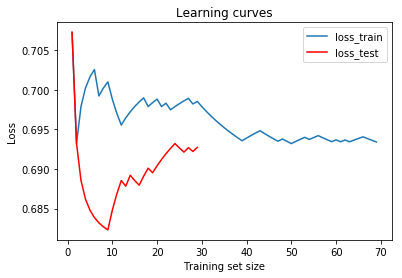

In [19]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, best_clf)

Ponovno iscrtavanje skupa podataka:


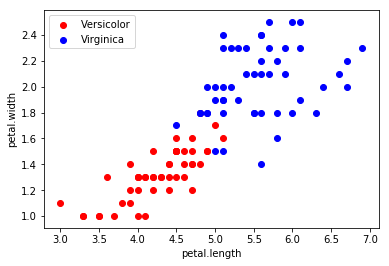

In [20]:
print('Ponovno iscrtavanje skupa podataka:')
colors = ['red', 'blue']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)
    
plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [26]:
petal_length = float(input('Unesite petal.length:'))
petal_width = float(input('Unesite petal.width:'))

x = np.array([1, petal_length, petal_width])
print(x)

[1.  3.7 1.3]


In [27]:
y_predict = best_clf.predict(x)
print(y_predict)

if y_predict < 0.5:
    print(class_to_name_dict[0])
else:
    print(class_to_name_dict[1])

0.506964272040734
Virginica


In [28]:
print('Ocajna predikcija!!! :O')


Ocajna predikcija!!! :O
